## **INSTALLING REQUIRED LIBRARY**

In [256]:
! pip install docx
! pip install --upgrade python-docx


## **DEFINING FUNCTION TO CONVERT ALL .DOC FILES INTO .DOCX FILES**

In [257]:
import os
import win32com.client

def convert_all_docs_to_docx(root_folder, output_root_folder):
    word = win32com.client.Dispatch("Word.Application")  # Initialize Word application
    
    for folder_path, subfolders, filenames in os.walk(root_folder):
        relative_path = os.path.relpath(folder_path, root_folder)
        output_folder = os.path.join(output_root_folder, relative_path)
        os.makedirs(output_folder, exist_ok=True)

        for file in filenames:
            if file.endswith(".doc") and not file.endswith(".docx"):  # Process only .doc files
                doc_file = os.path.join(folder_path, file)
                docx_file = os.path.join(output_folder, os.path.splitext(file)[0] + ".docx")
                
                print(f"Converting: {doc_file} → {docx_file}")
                doc = word.Documents.Open(doc_file)
                doc.SaveAs(docx_file, FileFormat=16)  # FileFormat=16 corresponds to .docx
                doc.Close()

    word.Quit()  # Quit Word here
    print("All files converted successfully!")


In [258]:
# the main function and quit Word after all conversions are complete
# Define input and output root folders
root_folder_path = r"C:\Nagesh Agrawal\##PROJECT\extracted_folder"  # The top-level folder(EXTRACTED ZIP FILE) containing subfolders
output_root_folder_path = r"C:\Nagesh Agrawal\##PROJECT\extracted_folder" # The folder to save converted files
#[CONVERTED FILES ARE ALSO STORED IN SAME FOLDER].
# THAT MEANS THERE WILL BE TOTAL 106 FILE AFTER RUNNING THIS FUNCTION: AS 28 .DOC FILES WILL BE CONVERT INTO .DOCX FILES AND SAVED INTO SAME FOLDER....
# CONVERTING .DOC ----> .DOCX
convert_all_docs_to_docx(root_folder_path, output_root_folder_path)




Converting: C:\Nagesh Agrawal\##PROJECT\extracted_folder\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_G Ananda Rayudu.doc → C:\Nagesh Agrawal\##PROJECT\extracted_folder\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_G Ananda Rayudu.docx
Converting: C:\Nagesh Agrawal\##PROJECT\extracted_folder\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_Gangareddy.doc → C:\Nagesh Agrawal\##PROJECT\extracted_folder\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_Gangareddy.docx
Converting: C:\Nagesh Agrawal\##PROJECT\extracted_folder\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_Priyanka Ramadoss.doc → C:\Nagesh Agrawal\##PROJECT\extracted_folder\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_Priyanka Ramadoss.docx
Converting: C:\Nagesh Agrawal\##PROJECT\extracted_folder\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_srinivasarao.doc → C:\Nagesh Agrawal\##PROJECT\extracted_folder\Resumes_Docx\Peoplesoft Resume\Peoplesoft Admin_srinivasarao.docx
Converting: C:\Nagesh Agrawal\##PROJECT\extracte

## **TO CHECK THE COUNT OF FILES IN THAT FOLDER**

In [259]:
import os

def count_files_by_type(folder_path):
    file_type_count = {}
    total_files = 0

    for root, _, files in os.walk(folder_path):
        for file in files:
            ext = os.path.splitext(file)[1].lower() or "No Extension"  # Get file extension or label as 'No Extension'
            file_type_count[ext] = file_type_count.get(ext, 0) + 1
            total_files += 1

    return file_type_count, total_files

folder_path = r"C:\Nagesh Agrawal\##PROJECT\extracted_folder"
file_counts, total_files = count_files_by_type(folder_path)

print("File type counts:")
for ext, count in file_counts.items():
    print(f"{ext}: {count}")

print(f"\nTotal number of files: {total_files}")


File type counts:
.docx: 79
.doc: 26
.pdf: 1

Total number of files: 106


## **LOADING ALL 79 .DOCX FILES**

In [260]:
import os
import docx
import pandas as pd
import re
import numpy as np

def read_docx(file_path):
    try:
        doc = docx.Document(file_path)
        content = ""

        for paragraph in doc.paragraphs:
            content += paragraph.text + "\n"

        return content
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

def read_resume(directory):
    file_path = []
    category = []
    file_content = []
    file_name = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".docx"):  # Process only .docx files
                print(file)
                file_path.append(os.path.join(root, file))
                folder_name = os.path.basename(root)

                if folder_name == "Resumes_Docx":
                    folder_name = "Peoplesoft Resume"

                elif re.search(r'\bresumes\b', folder_name, flags=re.IGNORECASE):
                    folder_name = folder_name.replace("resumes", "").strip()

                category.append(folder_name)
                file_name.append(file)

                content = read_docx(os.path.join(root, file))
                file_content.append(content)
    
    # Create a DataFrame
    df = pd.DataFrame({
        'File': file_name,
        'Content': file_content,
        'JobPost': category
    })

    return df

DATA = read_resume(r"C:\Nagesh Agrawal\##PROJECT\extracted_folder")
print("---------------")
print(DATA)


Peoplesoft Admin_G Ananda Rayudu.docx
An error occurred: "no relationship of type 'http://schemas.openxmlformats.org/officeDocument/2006/relationships/officeDocument' in collection"
Peoplesoft Admin_AnubhavSingh.docx
Peoplesoft Admin_G Ananda Rayudu.docx
Peoplesoft Admin_Gangareddy.docx
Peoplesoft Admin_Murali.docx
Peoplesoft Admin_Priyanka Ramadoss.docx
Peoplesoft Admin_SirazuddinMohammad.docx
Peoplesoft Admin_srinivasarao.docx
Peoplesoft Admin_Varkala Vikas.docx
Peoplesoft Admin_Vinod Akkala.docx
PeopleSoft DBA_Ganesh Alladi.docx
PeopleSoft DBA_Vivekanand Sayana.docx
Peoplesoft Finance_Arun Venu.docx
Peoplesoft Finance_Pritam Biswas.docx
Peoplesoft Finance_Rahul Ahuja.docx
Peoplesoft FSCM_HariNarayana.docx
Peoplesoft FSCM_Murali.docx
Peoplesoft FSCM_PriyabrataHota.docx
Peoplesoft FSCM_R Ahmed.docx
Peoplesoft FSCM_SUJATHA.docx
Resume_Subha Santosh_Peoplesoft FSCM.docx
Internship_Ravali_Musquare Technologies (1).docx
Internship_Susovan Bag_Musquare Technologies.docx
React Developer_Dee

In [261]:
DATA

,File,Content,JobPost
0,Peoplesoft Admin_G Ananda Rayudu.docx,None,Peoplesoft
1,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft Resume
2,Peoplesoft Admin_G Ananda Rayudu.docx,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,Peoplesoft Resume
3,Peoplesoft Admin_Gangareddy.docx,PeopleSoft Database Administrator\n ...,Peoplesoft Resume
4,Peoplesoft Admin_Murali.docx,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft Resume
...,...,...,...
74,Sri Krishna S_Hexaware.docx,\tWorkday Integration Consultant\n\nName ...,workday
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday
77,Venkateswarlu B_Hexaware.docx,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday


# **EXPLORATORY DATA ANALYSIS**

In [262]:
# CHECKING FOR NULL OR NONE IN DATA:
DATA.isna().sum()

File       0
Content    1
JobPost    0
dtype: int64

In [263]:
# DROPING THE ROWS WITH NONE CONTENT:
DATA = DATA.dropna()

In [264]:
# RESETTING INDEX :
DATA.reset_index(drop=True, inplace=True)

In [265]:
DATA # NOW THERE ARE 78 FILES DATA..

,File,Content,JobPost
0,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft Resume
1,Peoplesoft Admin_G Ananda Rayudu.docx,\n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...,Peoplesoft Resume
2,Peoplesoft Admin_Gangareddy.docx,PeopleSoft Database Administrator\n ...,Peoplesoft Resume
3,Peoplesoft Admin_Murali.docx,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft Resume
4,Peoplesoft Admin_Priyanka Ramadoss.docx,"Priyanka Ramadoss\n61/46, MountPleasant, \nCoo...",Peoplesoft Resume
...,...,...,...
73,Sri Krishna S_Hexaware.docx,\tWorkday Integration Consultant\n\nName ...,workday
74,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,workday
75,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,workday
76,Venkateswarlu B_Hexaware.docx,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,workday


In [266]:
# AGAIN CHECKING FOR NULL:
DATA[DATA.isna().any(axis=1)]
# THERE IS NO NONE CONTENT ANYMORE .....

,File,Content,JobPost


In [267]:
# CHECKING FOR DUPLICATE RECORDS.... 
DATA.duplicated().sum()

0

In [268]:
# CHECKING FOR DUPLICATES IN CONTENT COLUMN  :
DATA["Content"].duplicated().sum()

0

In [269]:
DATA.describe()
# THERE ARE 4 UNIQUE JOBPOST 
# React Developer IS THE MOST OCCURING JOB POST MEANS MAXIMUM RESUME ARE OF React Developer.
# THERE 23 RESUME ARE FOR React Developer

,File,Content,JobPost
count,78,78,78
unique,78,78,4
top,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,React Developer
freq,1,1,23


# **BESIC TEXT PROCESSING**

* ### **1. CONVERTING TEXT INTO LOWERCASE**
* ### **2. REMOVE SPECIAL CHARECTERS AND PUNCHUATION MARKS**
* ### **3. REMOVE EXTRA SPACES**

* ### **4. REMOVE STOPWORDS(e.g.: AND |OR|THE|IS,etc)**

* ### **5. TO REMOVE HTML TAGS AND ALL....**

* ### **6. REMOVE LINKS...**

* ### **7.TOKENISATION**
* ### **8.LEMMETIZATION**

In [270]:
# TO DISPLAY TEXT INSIDE 1ST ROW :
print(DATA['Content'][0])

  Anubhav Kumar Singh		

  To work in a globally competitive environment on 
  challenging assignments that shall yield the 
  twin benefits of the job satisfaction and a steady-paced 
  professional growth.






 


 


 Professional Experience

 06/2019 - Current	HCL										
			Current Role: System Admin Offshore
			Skills : Shell Scripting, Linux , PeopleSoft Administration , Github

Managing PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS.
Involved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.
Troubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.
Applying Tuxedo and WebLogic Middleware CPU patches for various applications.
Working on shell scripting used as integration method for exchange of files to external systems
Installation and troubleshooting of 2-tier setup as per requirement.
Reviewing 

In [271]:
# CONVERTING ALL TEXT IN CONTENT COLUMN TO LOWER CASE:
DATA.loc[:, 'Content'] = DATA['Content'].str.lower()

In [272]:
# TO REMOVE SPECIAL CHARECTERS AND PUNCHUATION MARKS:
import re
DATA.loc[:,'Content'] = DATA['Content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


In [273]:
# TO REMOVE EXTRA SPACES :
DATA.loc[:,'Content'] = DATA['Content'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [274]:
# TO REMOVE STOPWORDS(e.g.: AND |OR|THE|IS,etc)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
DATA.loc[:,'Content'] = DATA['Content'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

In [275]:
# TO REMOVE HTML TAGS AND ALL :
from bs4 import BeautifulSoup

# Function to clean HTML tags
def remove_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply to the 'Content' column
DATA.loc[:, 'Content'] = DATA['Content'].apply(remove_html)


In [276]:
# TO REMOVE INTEGERS FROM THE DATA:
DATA.loc[:, 'Content'] = DATA.loc[:, 'Content'].str.replace(r'\d+', '', regex=True)

In [277]:
# TO REMOVE LINKS :
import re

DATA.loc[:, 'Content'] = DATA.loc[:, 'Content'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)


In [278]:
# TOKENIZATION :
from nltk.tokenize import word_tokenize
DATA.loc[:,'Content'] = DATA['Content'].apply(lambda x: ' '.join(word_tokenize(x)))

In [279]:
print(DATA['Content'][0])

anubhav kumar singh work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steadypaced professional growth professional experience current hcl current role admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments support environments installed linux windows os involved day day activities project migration database refresh admin changes tax updates troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patches various applications working shell scripting used integration method exchange files external systems installation troubleshooting tier setup requirement reviewing vulnerabilities reported security teams renewal ssl weblogic vulnerability remediation vulnerability report rmis team worked pum peoplesoft update manager installation dpk working knowledge ansible docker devel

## **CHECKING FOR CLASS DISTRIBUTION**

In [280]:
DATA["JobPost"].value_counts()
# 23 resume for  React Developer
# 21 resume for workday
# 20 resume for Peoplesoft Resume
# 14 resume for SQL Developer

# JobPost IS OUR TARGET VARIABLE HAVING THESE 4 CLASSES
# >>>ITS SEEMS THAT ALL CLASSES ARE BALANCED <<<

JobPost
React Developer      23
workday              21
Peoplesoft Resume    20
SQL Developer        14
Name: count, dtype: int64

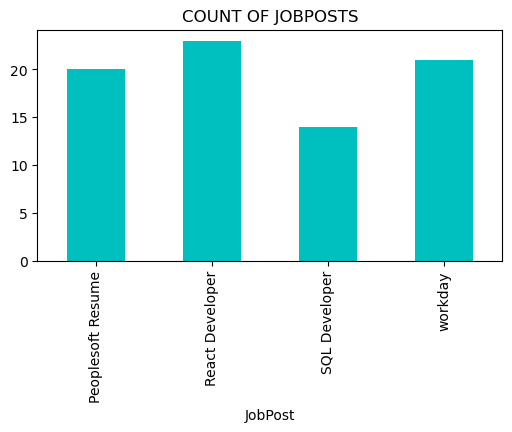

In [281]:
import matplotlib.pyplot as plt
DATA['JobPost'].value_counts().sort_index().plot(kind='bar', figsize=(6,3),color='c',title="COUNT OF JOBPOSTS")
plt.show()

# **Approach for Resume Classification**

Since text preprocessing has already been completed, the next steps involve:

# **1. Feature Extraction :**
## **Converting  processed text into numerical representations using :**

  
* Bag of Words (BoW): Captures word frequency.
* TF-IDF: Highlights important words based on frequency and uniqueness.
* Word Embeddings: Dense word vectors using Word2Vec, GloVe, or FastText.
* Pretrained Embeddings: Advanced contextual representations using models like BERT.

##### **All these methods convert text into numerical features in unique ways, which directly affect how well the model performs.**
##### **Bag of Words and TF-IDF focus on word frequency**
##### **while Word Embeddings and Pretrained Models capture deeper word meanings and context.**

# **2. Model Building :**
# **3. Model Evaluation :**

In [282]:
DATA

,File,Content,JobPost
0,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,Peoplesoft Resume
1,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary years experience implementing ...,Peoplesoft Resume
2,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,Peoplesoft Resume
3,Peoplesoft Admin_Murali.docx,murali experience summary years experience wor...,Peoplesoft Resume
4,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft Resume
...,...,...,...
73,Sri Krishna S_Hexaware.docx,workday integration consultant sri krishna s p...,workday
74,Srikanth-Hexaware.docx,seeking suitable positions workday hcm techno ...,workday
75,SSKumar_Hexaware.docx,workday hcm fcm kumar ss role workday consulta...,workday
76,Venkateswarlu B_Hexaware.docx,venkateswarlub workday consultant having years...,workday


- ## **Bag of Words (BoW): Captures word frequency.**

In [283]:
from sklearn.feature_extraction.text import CountVectorizer

In [284]:
# Bag-of-Words Vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # Adjust max_features as needed
X_bow = bow_vectorizer.fit_transform(DATA['Content'])

# **MODEL BUILDING USING BAG OR WORD DATAFRAME :**

Here is a list of classification models you can use after applying Bag of Words:

1. Logistic Regression
2. Naive Bayes (Multinomial)
3. Support Vector Machine (SVM)
4. Decision Trees
5. Random Forest
6. K-Nearest Neighbors (KNN)
7. XGBoost (Extreme Gradient Boosting)
8. LightGBM
9. Neural Networks (MLP)
10. Stochastic Gradient Descent (SGD) Classifier

## **PROCESSING DATA :**

In [285]:
# DEFINING X VARIABLES AND Y VARIABLE :
x=bow_df
y=DATA["JobPost"]

In [286]:
# SPLITING THE DATA INTO TRAINING AND TESTING SETS:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

## **LOGISTIC REGRESSION MODEL**

In [287]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(max_iter=1000)  # Increase max_iter if you get convergence warnings
LR.fit(xtrain,ytrain)

LogisticRegression(max_iter=1000)

In [288]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y_train_pred = LR.predict(xtrain)

# Make predictions on the testing data
y_test_pred = LR.predict(xtest)

# Calculate training accuracy
print("train_accuracy =", accuracy_score(ytrain, y_train_pred))
# Calculate testing accuracy
print("test_accuracy =", accuracy_score(ytest, y_test_pred))
# the model is overfitted

train_accuracy = 1.0
test_accuracy = 1.0


## **Naive Bayes MODEL**

In [289]:
from sklearn.naive_bayes import MultinomialNB
NB= MultinomialNB()
NB.fit(xtrain,ytrain)

MultinomialNB()

In [290]:
# Make Predictions
y_train_pred = NB.predict(xtrain)
y_test_pred = NB.predict(xtest)

# Calculate Training and Testing Accuracy
print("train_accuracy =", accuracy_score(ytrain, y_train_pred))
print("test_accuracy =", accuracy_score(ytest, y_test_pred))

train_accuracy = 1.0
test_accuracy = 1.0


## **SUPPORT VECTOR MACHINE MODEL**

In [291]:
from sklearn.svm import SVC
SVM= SVC(kernel='linear')  # You can also try 'rbf' for non-linear kernels
SVM.fit(xtrain,ytrain)

SVC(kernel='linear')

In [292]:
# Make predictions
y_train_pred = SVM.predict(xtrain)
y_test_pred = SVM.predict(xtest)

# Calculate training and testing accuracy
print("train_accuracy =", accuracy_score(ytrain, y_train_pred))
print("test_accuracy =", accuracy_score(ytest, y_test_pred))

train_accuracy = 1.0
test_accuracy = 1.0


In [326]:
import pickle
pickle.dump(SVM,open('resume.pkl','wb'))

In [327]:
import os
print(os.getcwd())


C:\Users\DELL\anaconda3\Scripts


## **DECISION TREE MODEL**

In [293]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier(random_state=2)
DC.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=2)

In [294]:
# Make predictions
y_train_pred = DC.predict(xtrain)
y_test_pred = DC.predict(xtest)

# Calculate training and testing accuracy
print("train_accuracy =", accuracy_score(ytrain, y_train_pred))
print("test_accuracy =", accuracy_score(ytest, y_test_pred))

train_accuracy = 1.0
test_accuracy = 0.9375


## **RANDOM FOREST MODEL**

In [295]:
from sklearn.ensemble import RandomForestClassifier
RC= RandomForestClassifier(n_estimators=100, random_state=2)
RC.fit(xtrain,ytrain)

RandomForestClassifier(random_state=2)

In [296]:
# Make predictions
y_train_pred = RC.predict(xtrain)
y_test_pred = RC.predict(xtest)

# Calculate training and testing accuracy
print("train_accuracy =", accuracy_score(ytrain, y_train_pred))
print("test_accuracy = ",accuracy_score(ytest, y_test_pred))

train_accuracy = 1.0
test_accuracy =  1.0


## **REGULARIZATION**

In [297]:
y

0     Peoplesoft Resume
1     Peoplesoft Resume
2     Peoplesoft Resume
3     Peoplesoft Resume
4     Peoplesoft Resume
            ...        
73              workday
74              workday
75              workday
76              workday
77              workday
Name: JobPost, Length: 78, dtype: object

In [298]:
# label encoding to y variable:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Apply label encoding


In [299]:
# SPLITING THE DATA INTO TRAINING AND TESTING SETS:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y_encoded,test_size=0.2,random_state=1)

In [300]:
# L2 REGULARIZATION Recommended for most text classification tasks.
from sklearn.linear_model import Ridge 
l2=Ridge(alpha=1)
l2.fit(xtrain,ytrain)
print(l2.score(xtrain,ytrain))
print(l2.score(xtest,ytest))
# AFTER REGULARIZATION ALSO THE MODEL IS OVERFITTED....

0.9999979003364342
0.8282401997704517


In [301]:
#  HYPER PARAMETER TUNING OF ALPHA VALUE:
for a in range(1,100):
    l2=Ridge(alpha=a)
    l2.fit(xtrain,ytrain)
    print(f"alpha:{a} | training accuracy :{l2.score(xtrain,ytrain)} | test accuracy{l2.score(xtest,ytest)}")
# alpha:1 is good...

alpha:1 | training accuracy :0.9999979003364342 | test accuracy0.8282401997704517
alpha:2 | training accuracy :0.9999917141024359 | test accuracy0.8282293319774526
alpha:3 | training accuracy :0.9999816038025615 | test accuracy0.8282194758476801
alpha:4 | training accuracy :0.9999677237615624 | test accuracy0.8282100052115196
alpha:5 | training accuracy :0.9999502208017765 | test accuracy0.828200452390638
alpha:6 | training accuracy :0.999929234796109 | test accuracy0.8281904673495191
alpha:7 | training accuracy :0.9999048991365753 | test accuracy0.8281797884876366
alpha:8 | training accuracy :0.9998773411425843 | test accuracy0.8281682214042838
alpha:9 | training accuracy :0.9998466824241352 | test accuracy0.8281556232299612
alpha:10 | training accuracy :0.9998130392098112 | test accuracy0.8281418909120528
alpha:11 | training accuracy :0.9997765226462464 | test accuracy0.8281269523535244
alpha:12 | training accuracy :0.9997372390737472 | test accuracy0.8281107596392443
alpha:13 | trai

- ## **TFIDF VECTORIZATION: Highlights important words based on frequency and uniqueness.**

In [302]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [303]:
import numpy as np
b=np.array(DATA["Content"])

In [304]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_
# THE VALUES REPRESENTS after applying TfidfVectorizer represent the importance of words in each document, with respect to the entire dataset.

{'anubhav': 189,
 'kumar': 2073,
 'singh': 3466,
 'work': 4162,
 'globally': 1570,
 'competitive': 695,
 'environment': 1282,
 'challenging': 583,
 'assignments': 263,
 'shall': 3418,
 'yield': 4211,
 'twin': 3927,
 'benefits': 389,
 'job': 2004,
 'satisfaction': 3297,
 'steadypaced': 3614,
 'professional': 2911,
 'growth': 1625,
 'experience': 1347,
 'current': 895,
 'hcl': 1667,
 'role': 3250,
 'admin': 72,
 'offshore': 2553,
 'skills': 3479,
 'shell': 3426,
 'scripting': 3340,
 'linux': 2146,
 'peoplesoft': 2716,
 'administration': 79,
 'github': 1560,
 'managing': 2236,
 'hcm': 1668,
 'fscm': 1497,
 'production': 2906,
 'environments': 1284,
 'support': 3697,
 'installed': 1897,
 'windows': 4149,
 'os': 2612,
 'involved': 1960,
 'day': 941,
 'activities': 51,
 'project': 2929,
 'migration': 2340,
 'database': 929,
 'refresh': 3113,
 'changes': 586,
 'tax': 3751,
 'updates': 3974,
 'troubleshooting': 3916,
 'various': 4029,
 'servers': 3392,
 'like': 2134,
 'application': 201,
 'web

In [305]:
TFIDF=pd.DataFrame(b,columns=tv.get_feature_names_out())
TFIDF

,aa,abdul,abilities,abilitiescommunication,ability,able,abovementioned,abreast,abs,absence,...,yield,yii,yogi,yonder,york,yoursincerely,yrs,zenefits,zero,zp
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.033315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.028706,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.039661,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.051112,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.0,0.0,0.000000,0.0,0.017062,0.0,0.000000,0.000000,0.0,0.023310,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.000000,0.0,0.018369,0.0,0.000000,0.000000,0.0,0.175673,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.023130,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.068444,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.052508,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
XTrain,XTest,YTrain,YTest=train_test_split(TFIDF,DATA['JobPost'],random_state=42,test_size=0.20,stratify=DATA['JobPost'])

# **MODEL BUILDING USING TFIDF DATAFRAME :**

## **LOGISTIC REGRESSION MODEL**

In [319]:
DATA

,File,Content,JobPost
0,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,Peoplesoft Resume
1,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary years experience implementing ...,Peoplesoft Resume
2,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,Peoplesoft Resume
3,Peoplesoft Admin_Murali.docx,murali experience summary years experience wor...,Peoplesoft Resume
4,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft Resume
...,...,...,...
73,Sri Krishna S_Hexaware.docx,workday integration consultant sri krishna s p...,workday
74,Srikanth-Hexaware.docx,seeking suitable positions workday hcm techno ...,workday
75,SSKumar_Hexaware.docx,workday hcm fcm kumar ss role workday consulta...,workday
76,Venkateswarlu B_Hexaware.docx,venkateswarlub workday consultant having years...,workday


# **MODEL BUILDING**

In [310]:
DATA

,File,Content,JobPost
0,Peoplesoft Admin_AnubhavSingh.docx,anubhav kumar singh work globally competitive ...,Peoplesoft Resume
1,Peoplesoft Admin_G Ananda Rayudu.docx,profile summary years experience implementing ...,Peoplesoft Resume
2,Peoplesoft Admin_Gangareddy.docx,peoplesoft database administrator gangareddy p...,Peoplesoft Resume
3,Peoplesoft Admin_Murali.docx,murali experience summary years experience wor...,Peoplesoft Resume
4,Peoplesoft Admin_Priyanka Ramadoss.docx,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft Resume
...,...,...,...
73,Sri Krishna S_Hexaware.docx,workday integration consultant sri krishna s p...,workday
74,Srikanth-Hexaware.docx,seeking suitable positions workday hcm techno ...,workday
75,SSKumar_Hexaware.docx,workday hcm fcm kumar ss role workday consulta...,workday
76,Venkateswarlu B_Hexaware.docx,venkateswarlub workday consultant having years...,workday
